In [165]:
df

,school_code,county,public/private,district,city,school_name,enrollment,vaccinated_n,vaccinated_perc,temp_unvax_n,...,mmr_n,mmr_perc,hepb_n,hepb_perc,varicell_n,varicella_perc,reported,year,state,fips
0,123968,Alameda,PUBLIC,ALAMEDA COUNTY OFFICE OF EDUCATION,OAKLAND,COMMUNITY SCHOOL FOR CREATIVE EDUCATION,33.0,31.0,0.9394,2.0,...,31.0,93.94,31.0,93.94,31.0,93.94,Y,2015,CA,6001
1,6001788,Alameda,PUBLIC,ALAMEDA COUNTY OFFICE OF EDUCATION,OAKLAND,COX ACADEMY,132.0,66.0,0.5000,66.0,...,86.0,65.15,99.0,75.00,103.0,78.03,Y,2015,CA,6001
2,6002000,Alameda,PUBLIC,ALAMEDA COUNTY OFFICE OF EDUCATION,OAKLAND,LAZEAR CHARTER ACADEMY,70.0,60.0,0.8571,10.0,...,61.0,87.14,66.0,94.29,67.0,95.71,Y,2015,CA,6001
3,125567,Alameda,PUBLIC,ALAMEDA COUNTY OFFICE OF EDUCATION,OAKLAND,URBAN MONTESSORI CHARTER,60.0,48.0,0.8000,3.0,...,50.0,83.33,48.0,80.00,50.0,83.33,Y,2015,CA,6001
4,124172,Alameda,PUBLIC,ALAMEDA COUNTY OFFICE OF EDUCATION,OAKLAND,YU MING CHARTER,53.0,50.0,0.9434,0.0,...,50.0,94.34,50.0,94.34,50.0,94.34,Y,2015,CA,6001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,107375,Yuba,PUBLIC,PLUMAS LAKE ELEMENTARY,PLUMAS LAKE,RIO DEL ORO ELEMENTARY,94.0,92.0,0.9787,1.0,...,92.0,97.87,93.0,98.94,93.0,98.94,Y,2015,CA,6115
5704,6056832,Yuba,PUBLIC,WHEATLAND,BEALE AIR FORCE BASE,LONE TREE ELEMENTARY,97.0,80.0,0.8247,15.0,...,86.0,88.66,94.0,96.91,93.0,95.88,Y,2015,CA,6115
5705,6118806,Yuba,PUBLIC,WHEATLAND,BEALE AFB,WHEATLAND CHARTER ACADEMY,24.0,21.0,0.8750,3.0,...,21.0,87.50,24.0,100.00,24.0,100.00,Y,2015,CA,6115
5706,6056840,Yuba,PUBLIC,WHEATLAND,WHEATLAND,WHEATLAND ELEMENTARY,84.0,83.0,0.9881,0.0,...,83.0,98.81,83.0,98.81,83.0,98.81,Y,2015,CA,6115


In [166]:
pres_df = pres_df[pres_df.year == 2016]
pres_df = pres_df[pres_df.state == 'CA']
pres_df = pres_df.drop('State', axis=1)

In [167]:
df.columns

Index(['school_code', 'county', 'public/private', 'district', 'city',
       'school_name', 'enrollment', 'vaccinated_n', 'vaccinated_perc',
       'temp_unvax_n', 'temp_unvax_perc', 'perm_med_exemp_n',
       'perm_med_exemp_perc', 'pbe_n', 'pbe_perc', 'hcp_counceled_pbe_n',
       'hcp_counceled_pbe_perc', 'religious_exemp_n', 'religious_exemp_perc',
       'over_due_n', 'over_due_perc', 'five_dose_DTP_n', 'five_dose_DTP_perc',
       'polio_n', 'polio_perc', 'mmr_n', 'mmr_perc', 'hepb_n', 'hepb_perc',
       'varicell_n', 'varicella_perc', 'reported', 'year', 'state', 'fips'],
      dtype='object')

In [168]:

county_list = df.fips.unique().tolist()

In [169]:
def vax_percentage(df):
    percentage_list = []
    for fip in county_list:
        c_df = df[df.fips == fip]
        c_df['vaccinated_n'] = c_df['enrollment']* c_df['vaccinated_perc']
        enrollment = c_df['enrollment'].sum()
        percentage_vaccinated = (c_df['vaccinated_n'].sum()) / enrollment
        percentage_list.append(percentage_vaccinated)
    return percentage_list


In [170]:
percentage_vaccinated = vax_percentage(df)
percentage_vaccinated2018 = vax_percentage(df2)

<ipython-input-169-20bb1b4fa6f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['vaccinated_n'] = c_df['enrollment']* c_df['vaccinated_perc']
<ipython-input-169-20bb1b4fa6f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['vaccinated_n'] = c_df['enrollment']* c_df['vaccinated_perc']
<ipython-input-169-20bb1b4fa6f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [171]:
ca_vax_df_2015 = pd.DataFrame({'fips': county_list, 'vax_percentage': percentage_vaccinated})
ca_vax_df_2018 = pd.DataFrame({'fips': county_list, 'vax_percentage': percentage_vaccinated2018})

In [172]:
ca_list_dict = dict(zip(ca_vax_df_2015.fips,ca_vax_df_2015.vax_percentage))

In [173]:
ca_vax_df_2018

,fips,vax_percentage
0,6001,0.960919
1,6005,0.922462
2,6007,0.940757
3,6009,0.895938
4,6011,0.970745
5,6013,0.961462
6,6015,0.935871
7,6017,0.884062
8,6019,0.960208
9,6021,0.954612


In [174]:
ca_vax_df_2015

,fips,vax_percentage
0,6001,0.962155
1,6005,0.870878
2,6007,0.902701
3,6009,0.884900
4,6011,0.997456
5,6013,0.955932
6,6015,0.886800
7,6017,0.911614
8,6019,0.963567
9,6021,0.949788


In [175]:
dfcensus['percentage_vaccinated'] = dfcensus['FIP'].map(ca_list_dict)

In [176]:
dfcensus = dfcensus.drop(['Unnamed: 0', 'STATEFIP'], axis=1)

In [177]:
dfcensus['FIPS'] = dfcensus['FIP']

In [178]:
 completedf = pd.merge(pres_df, dfcensus, on = 'FIPS')

In [179]:
completedf.columns

Index(['Unnamed: 0', 'year', 'FIPS', 'office', 'state', 'dem_votes',
       'rep_votes', 'total_votes', 'target', 'County [2]', 'Population(2010)',
       'Land Areami²', 'Water Areami²', 'Total Areami²', 'Latitude',
       'Longitude', 'YEAR', 'avg_inc', 'avg_age', 'avg_educ', 'avg_educd',
       'sex', 'insurance', 'white', 'black',
       'american_indian_or_alaska_native', 'chinese', 'japanese',
       'other_asian_or_pacific_islander', 'other_race', 'two_major_races',
       'three_or_more_major_races', 'married_spouse_present',
       'married_spouse_absent', 'separated', 'divorced', 'widowed', 'single',
       'NA', 'at_work', 'has_job_not_working', 'armed_forces_at_work',
       'unemployed', 'not_in_labor_force', 'FIP', 'percentage_vaccinated'],
      dtype='object')

In [180]:
completedf = completedf.drop(['office', 'FIP', 'Unnamed: 0', 'state'], axis=1)

In [181]:
completedf.columns

Index(['year', 'FIPS', 'dem_votes', 'rep_votes', 'total_votes', 'target',
       'County [2]', 'Population(2010)', 'Land Areami²', 'Water Areami²',
       'Total Areami²', 'Latitude', 'Longitude', 'YEAR', 'avg_inc', 'avg_age',
       'avg_educ', 'avg_educd', 'sex', 'insurance', 'white', 'black',
       'american_indian_or_alaska_native', 'chinese', 'japanese',
       'other_asian_or_pacific_islander', 'other_race', 'two_major_races',
       'three_or_more_major_races', 'married_spouse_present',
       'married_spouse_absent', 'separated', 'divorced', 'widowed', 'single',
       'NA', 'at_work', 'has_job_not_working', 'armed_forces_at_work',
       'unemployed', 'not_in_labor_force', 'percentage_vaccinated'],
      dtype='object')

In [182]:
y = completedf['target']
X = completedf.drop(['target', 'County [2]', 'year', 'dem_votes', 'rep_votes', 'total_votes', 'FIPS', 'YEAR', 'Latitude', 'Longitude'], axis=1)

In [183]:
X.describe()

,Population(2010),Land Areami²,Water Areami²,Total Areami²,avg_inc,avg_age,avg_educ,avg_educd,sex,insurance,...,divorced,widowed,single,NA,at_work,has_job_not_working,armed_forces_at_work,unemployed,not_in_labor_force,percentage_vaccinated
count,3.400000e+01,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,3.400000e+01,34.000000,3.400000e+01,34.000000,34.000000,34.000000,3.400000e+01,34.000000
mean,1.056063e+06,2854.690735,171.425294,3026.116029,8.066739e+05,50.638824,7.334412,75.585882,0.492059,0.930294,...,55751.147059,30382.147059,9.950271e+04,92.970588,2.341121e+05,6422.470588,2632.970588,12440.441176,1.358667e+05,0.932072
std,1.742687e+06,3626.803898,221.830451,3627.743774,5.807907e+05,3.676743,0.825793,8.250944,0.082307,0.039961,...,81303.132720,49732.268791,1.894263e+05,273.779438,3.954779e+05,11750.995984,8720.495293,16838.782133,2.010709e+05,0.035001
min,1.346230e+05,46.873000,2.111000,231.889000,1.553124e+05,41.980000,5.470000,57.020000,0.170000,0.840000,...,1452.000000,0.000000,8.907000e+03,0.000000,1.884800e+04,0.000000,0.000000,0.000000,2.007400e+04,0.826974
25%,2.281022e+05,857.484750,36.437750,959.554000,4.646467e+05,48.740000,6.715000,69.472500,0.470000,0.902500,...,14742.000000,9012.500000,2.355100e+04,0.000000,5.142925e+04,138.500000,0.000000,3331.000000,3.906150e+04,0.908095
50%,4.630285e+05,1606.156500,83.369000,1722.539000,6.334971e+05,50.610000,7.535000,77.430000,0.500000,0.930000,...,30554.000000,16318.000000,4.317450e+04,0.000000,9.425850e+04,2208.000000,0.000000,7103.500000,7.073750e+04,0.947765
75%,1.019381e+06,3723.548250,267.437750,4001.049000,8.924490e+05,53.547500,7.897500,81.165000,0.527500,0.960000,...,59131.750000,29610.500000,9.691450e+04,0.000000,2.384530e+05,8828.250000,1455.750000,14198.500000,1.253728e+05,0.955744
max,9.818605e+06,20056.938000,1053.993000,20104.826000,2.985023e+06,57.520000,8.840000,90.700000,0.660000,1.000000,...,427986.000000,281459.000000,1.091137e+06,1168.000000,2.231731e+06,65418.000000,49147.000000,94430.000000,1.128328e+06,0.971114


In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

In [185]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=2021)

In [186]:
scaler.fit(X_train)

StandardScaler()

In [187]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)

In [188]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [189]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [190]:
model1 = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy:  1.0
Validation accuracy:  0.6666666666666666


In [191]:
alphas = np.arange(.01, 1, step=.01)[::-1]

In [192]:
train = []
val = []

for alpha in alphas:
    model = LogisticRegression(solver='liblinear', penalty='l2', C=alpha)
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    val_score = model.score(X_val_scaled, y_val)
    train.append(train_score)
    val.append(val_score)

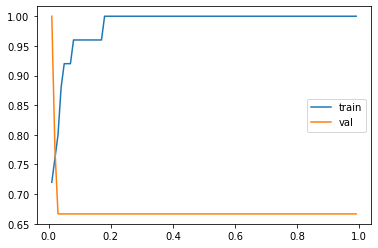

In [193]:
plt.plot(alphas, train, label='train')
plt.plot(alphas, val, label='val')
plt.legend()

In [194]:
zipped = list(zip(model1.coef_, X.columns[0]))

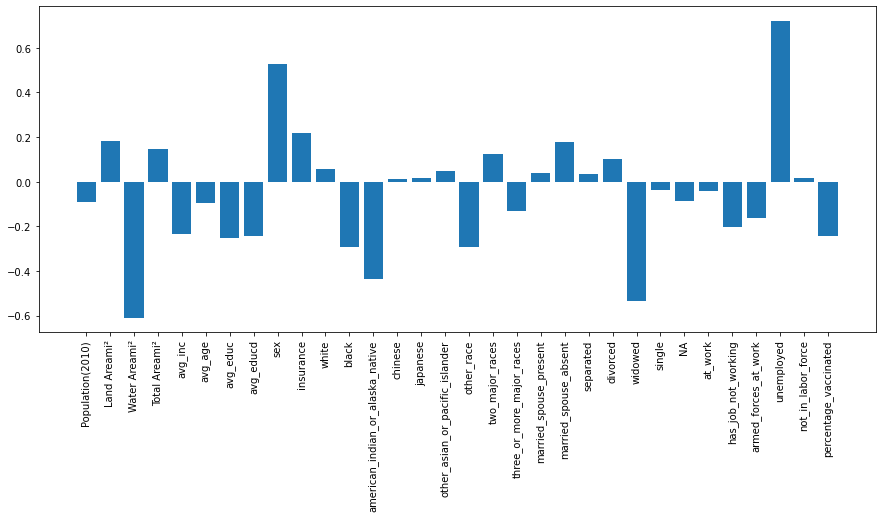

In [195]:
plt.figure(figsize=(15,6))
plt.bar(X.columns, model1.coef_[0])
plt.xticks(rotation=90);

In [196]:
from sklearn.feature_selection import RFE
scores = []

for num in range(1, X_train_scaled.shape[1]):
    
    selector = RFE(logreg, n_features_to_select=num, step=1)
    selector = selector.fit(X_train_scaled, y_train)
    score = selector.score(X_val_scaled, y_val)
    scores.append(score)
selector = RFE(logreg, n_features_to_select=1, step=1)
selector = selector.fit(X_train_scaled, y_train)
score = selector.score(X_val_scaled, y_val)
feature_importance = ca_list_dict = dict(zip(feature_list,selector.ranking_))

In [199]:
feature_importance

{'Population(2010)': 22,
 'Land Areami²': 9,
 'Water Areami²': 4,
 'Total Areami²': 16,
 'avg_inc': 12,
 'avg_age': 21,
 'avg_educ': 6,
 'avg_educd': 11,
 'sex': 3,
 'insurance': 15,
 'white': 24,
 'black': 8,
 'american_indian_or_alaska_native': 7,
 'chinese': 32,
 'japanese': 31,
 'other_asian_or_pacific_islander': 25,
 'other_race': 10,
 'two_major_races': 18,
 'three_or_more_major_races': 19,
 'married_spouse_present': 26,
 'married_spouse_absent': 14,
 'separated': 29,
 'divorced': 20,
 'widowed': 1,
 'single': 28,
 'NA': 23,
 'at_work': 27,
 'has_job_not_working': 13,
 'armed_forces_at_work': 17,
 'unemployed': 2,
 'not_in_labor_force': 30,
 'percentage_vaccinated': 5}

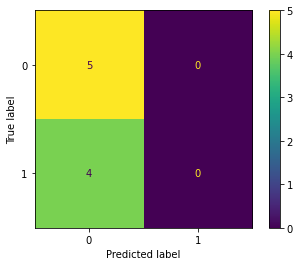

In [200]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(selector, X_val_scaled, y_val)

In [201]:
y_val

8     1
20    0
31    1
4     0
11    0
9     0
15    1
17    0
3     1
Name: target, dtype: int64

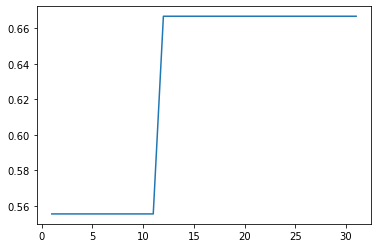

In [202]:
plt.plot(range(1, X_train_scaled.shape[1]), scores)

In [203]:
feature_list = list(X_train_scaled.columns)

In [204]:
feature_importance = ca_list_dict = dict(zip(feature_list,feature_rank))

In [205]:
feature_importance

{'Population(2010)': 1,
 'Land Areami²': 15,
 'Water Areami²': 1,
 'Total Areami²': 18,
 'avg_inc': 17,
 'avg_age': 1,
 'avg_educ': 12,
 'avg_educd': 16,
 'sex': 4,
 'insurance': 11,
 'white': 1,
 'black': 1,
 'american_indian_or_alaska_native': 9,
 'chinese': 7,
 'japanese': 1,
 'other_asian_or_pacific_islander': 1,
 'other_race': 8,
 'two_major_races': 1,
 'three_or_more_major_races': 14,
 'married_spouse_present': 1,
 'married_spouse_absent': 1,
 'separated': 2,
 'divorced': 5,
 'widowed': 1,
 'single': 13,
 'NA': 1,
 'at_work': 1,
 'has_job_not_working': 1,
 'armed_forces_at_work': 3,
 'unemployed': 1,
 'not_in_labor_force': 10,
 'percentage_vaccinated': 6}

In [207]:
ca_vax_df_2015.to_csv('../../data/ca_vax_df_2015.csv', index=False)
ca_vax_df_2018.to_csv('../../data/ca_vax_df_2018.csv', index=False)